<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/%20week10%20-%20Classification2%20/%20Walkthrough_Classification_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

For classification we can use different algorithms, for example: 
- Logisitic regression (seen last week)
- K-Nearest Neighbours
- Decision Tree
- Random Forest
- Gradient Descent
- etc. 

This week we will cover **K-Nearest Neighbours** and **Decision Trees**.




For the walkthrough we will use the same dataset as last week and show new classification algorithms. Independently on which algorithm we use we need always to: 
- load our data set
- define our dependent and independent variables
- split our data set into train and test subsets
- normalize our data set
- create the model (regression, KNN, decision tree, ...)
- train our model 
- check the accuracy

In [0]:
#Load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week9%20/data/fruit_data_with_colors_2classes.csv'
fruits = pd.read_csv(url,sep=";")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,1,apple,braeburn,178,7.1,7.8,0.92
4,1,apple,braeburn,172,7.4,7.0,0.89


In [0]:
#Define features and target variable
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

Let's see the different classes

In [0]:
print(fruits['fruit_name'].unique())

['apple' 'orange']


Same as last week, we are going to try a fruit (find its name) using features like its mass

#### 1) Split into train and test set
 
The data is split into random train and test subsets. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We use the test dataset in order to test our prediction on this subset.


In [0]:
#Split data set into a train and a test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### 2) Normalization

When we have a dataset with features that have very distinct ranges (for example one feature where age is between 0 and 99 year and another feature being the income raning from 1'000CHF to 200'000CHF) we might get biaised results. We want the features to be in the same or similar ranges. Therefore, we **normalize** the data. It involves scaling all values for a specific feature given attribute so that they fall within a small specified range.
We can use *StandardScaler()*, *MinMaxScaler* () or others for normalization.
<br>

In our example we will normalize our **train AND test data** using MinMaxScaler.

/!\ **IMPORTANT**: When you normalize the train data, you need to do the same modificaiton (here normalization) to the test data. 

In [0]:
#Define normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)

array([[0.09009009, 0.13793103, 0.30769231, 0.55263158],
       [0.08108108, 0.17241379, 0.38461538, 0.57894737],
       [0.06306306, 0.20689655, 0.19230769, 0.63157895],
       [0.06306306, 0.17241379, 0.15384615, 0.71052632],
       [0.06306306, 0.13793103, 0.26923077, 0.60526316],
       [0.04504505, 0.13793103, 0.42307692, 0.52631579],
       [0.01801802, 0.03448276, 0.23076923, 0.52631579],
       [0.10810811, 0.20689655, 0.34615385, 0.39473684],
       [0.0990991 , 0.27586207, 0.11538462, 0.73684211],
       [0.11711712, 0.06896552, 0.19230769, 1.        ],
       [0.        , 0.20689655, 0.11538462, 0.84210526],
       [0.0990991 , 0.24137931, 0.15384615, 0.78947368],
       [0.06306306, 0.10344828, 0.11538462, 0.86842105],
       [0.22522523, 0.27586207, 0.5       , 0.5       ],
       [0.18018018, 0.44827586, 0.        , 0.10526316],
       [0.12612613, 0.27586207, 0.30769231, 0.47368421],
       [0.10810811, 0.17241379, 0.07692308, 0.65789474],
       [0.09009009, 0.10344828,

In [0]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 3) KNN (K-Neirest Neighbor Classification) <br> 

KNN algorithm classifies new examples considering the most represented class among the K nearest neighbors in the hyperspace. This means that if k = 1, the object is simply assigned to the class of the single nearest neighbor. If k = 5, then the classification of the object will be based on the the 5 nearest data points. KNN classifies according to majority vote. It is simple to implement, robust to noisy training data, and effective if training data is large. Nevertheless, we need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples. <br>

As seen before we will first need to create our model. We will build the model from the **training set**. So, we will need to split our dataset into **test** and **trainig sets**. Then we use the train set to create the model. Here we need to specify how many neighbors are to be considered in the classification when creating the model. 

In [0]:
#Create model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(10)

In [0]:
#Fit model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#Use model on test and check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.80


We chose k = 10 arbitrarily, maybe we can have a better accuracy with another number. Similarly we can change other parameters. Let's try with a different *weight* which gives less importance to far away points and to *p* to change the way we compute distance between 2 points [See here for information on p-norm](https://en.wikipedia.org/wiki/Minkowski_distance). Let's try for different values

In [0]:
n_neighbors = [2,3,4,5]
p_values = [1,2,3]
weights = ['uniform', 'distance']
for n in n_neighbors:
    for p in p_values:
        for w in weights:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(X_train, y_train)
            print("accuracy for k = " + str(n) + ", p = " + str(p) + ", weight = " + w + " : " + str(model.score(X_test, y_test)))

accuracy for k = 2, p = 1, weight = uniform : 1.0
accuracy for k = 2, p = 1, weight = distance : 1.0
accuracy for k = 2, p = 2, weight = uniform : 0.8
accuracy for k = 2, p = 2, weight = distance : 0.9
accuracy for k = 2, p = 3, weight = uniform : 0.8
accuracy for k = 2, p = 3, weight = distance : 0.9
accuracy for k = 3, p = 1, weight = uniform : 1.0
accuracy for k = 3, p = 1, weight = distance : 1.0
accuracy for k = 3, p = 2, weight = uniform : 1.0
accuracy for k = 3, p = 2, weight = distance : 1.0
accuracy for k = 3, p = 3, weight = uniform : 0.9
accuracy for k = 3, p = 3, weight = distance : 0.9
accuracy for k = 4, p = 1, weight = uniform : 1.0
accuracy for k = 4, p = 1, weight = distance : 1.0
accuracy for k = 4, p = 2, weight = uniform : 0.9
accuracy for k = 4, p = 2, weight = distance : 1.0
accuracy for k = 4, p = 3, weight = uniform : 0.9
accuracy for k = 4, p = 3, weight = distance : 0.9
accuracy for k = 5, p = 1, weight = uniform : 0.9
accuracy for k = 5, p = 1, weight = dista

#### 4) Decision Tree <br>


A decision tree classifier relies on a decision tree to predict the class for a new data point. In fact, it produces a sequence of rules that can be used to classify the data. It is a great algorithm as it can be easily understood and visualized. Also, it can handle numerical and categorical data. It is possible that decision tree build models that are too complexe (*overfitting*), that cannot generalize well. It can also be unstable, as small variations in the data set might cause the generation of a completely different tree. <br>

Before building it we need to specify the maximum depth of our tree.

In [0]:
#create, fit and test model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


We achieve perfection on the test set, but our model may be overly complicated. Let's see if we can reduce max depth without losing accuracy.
Let's try randomely some numbers. 

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7


In [0]:
#fonction to find lowest depth (less complicated model) keeping an accuracy of 1
depth = 5
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
while accuracy == 1:
    depth -= 1
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
print(depth+1)

2


No handles with labels found to put in legend.


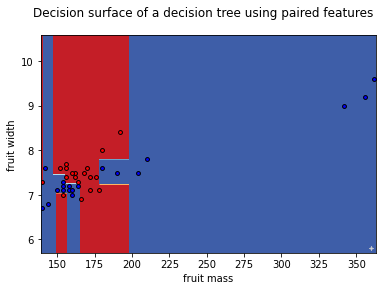

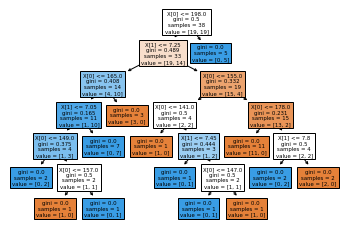

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_colors = "rb"
plot_step = 0.02


X = X[['mass', 'width']].values

clf = DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('fruit mass')
plt.ylabel('fruit width')

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i+1)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()